In [1]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import csv

%matplotlib inline
mpl.rcParams['figure.dpi'] = 800
#mpl.rc('text', usetex=True)
plt.rcParams.update({'font.size': 7})
font_size = 10

In [2]:
cases = ["RE_10", "RE_20", "RE_30", "RE_40", "RE_50", "RE_60", "RE_70", "RE_80", "RE_90", "RE_100",
         "RE_110", "RE_120", "RE_130", "RE_140", "RE_150", "RE_160", "RE_170", "RE_180", "RE_190", "RE_200"]
re = np.arange(10, 200+1, 10)

In [3]:
a_mean = [[] for i in range(len(cases))]
b_mean = [[] for i in range(len(cases))]
c_mean = [[] for i in range(len(cases))]
a_std  = [[] for i in range(len(cases))]
b_std  = [[] for i in range(len(cases))]
c_std  = [[] for i in range(len(cases))]

for i, case in enumerate(cases):
    
    fo_name = "./data/"+case+"/"
    
    # Cylinder A 
    df_a = pd.read_csv(fo_name + "surfaceFieldValue_a.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_a['cd'] = df_a['cd'].str.replace('(', '', regex=True)
    # Cylinder B
    df_b = pd.read_csv(fo_name + "surfaceFieldValue_b.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_b['cd'] = df_b['cd'].str.replace('(', '', regex=True)
    # Cylinder C
    df_c = pd.read_csv(fo_name + "surfaceFieldValue_c.dat", comment='#', index_col=0, delimiter=r"\s+", usecols=[0,1,2], names=['time', 'cd', 'cl'])
    df_c['cd'] = df_c['cd'].str.replace('(', '', regex=True)

    df_a["cl"] =  2.5 * df_a["cl"] 
    df_b["cl"] =  2.5 * df_b["cl"] 
    df_c["cl"] =  2.5 * df_c["cl"]

    n= 75.00  # trimmig param (first n time step)

    df = pd.read_csv(fo_name + "coefficient.dat", sep="\t", names=['time', 'cd', 'cl'], comment='#', usecols=[0,1,3])
    timescale = df["time"]
    idx = np.abs(timescale-n).argmin()
    t = timescale[idx:-1]
    trimmed_df_a = df_a.iloc[idx: , :]
    trimmed_df_b = df_b.iloc[idx: , :]
    trimmed_df_c = df_c.iloc[idx: , :]

    a_mean[i].append(trimmed_df_a["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    b_mean[i].append(trimmed_df_b["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    c_mean[i].append(trimmed_df_c["cl"].head(len(trimmed_df_a["cl"])-1).mean())
    a_std[i].append(trimmed_df_a["cl"].head(len(trimmed_df_a["cl"])-1).std())
    b_std[i].append(trimmed_df_b["cl"].head(len(trimmed_df_a["cl"])-1).std())
    c_std[i].append(trimmed_df_c["cl"].head(len(trimmed_df_a["cl"])-1).std())

a_mean = np.asarray(a_mean).flatten()
b_mean = np.asarray(b_mean).flatten()
c_mean = np.asarray(c_mean).flatten()
a_std  = np.asarray(a_std).flatten()
b_std  = np.asarray(b_std).flatten()
c_std  = np.asarray(c_std).flatten()

In [4]:
total_mean = a_mean + b_mean + c_mean
total_std = a_std + b_std + c_std

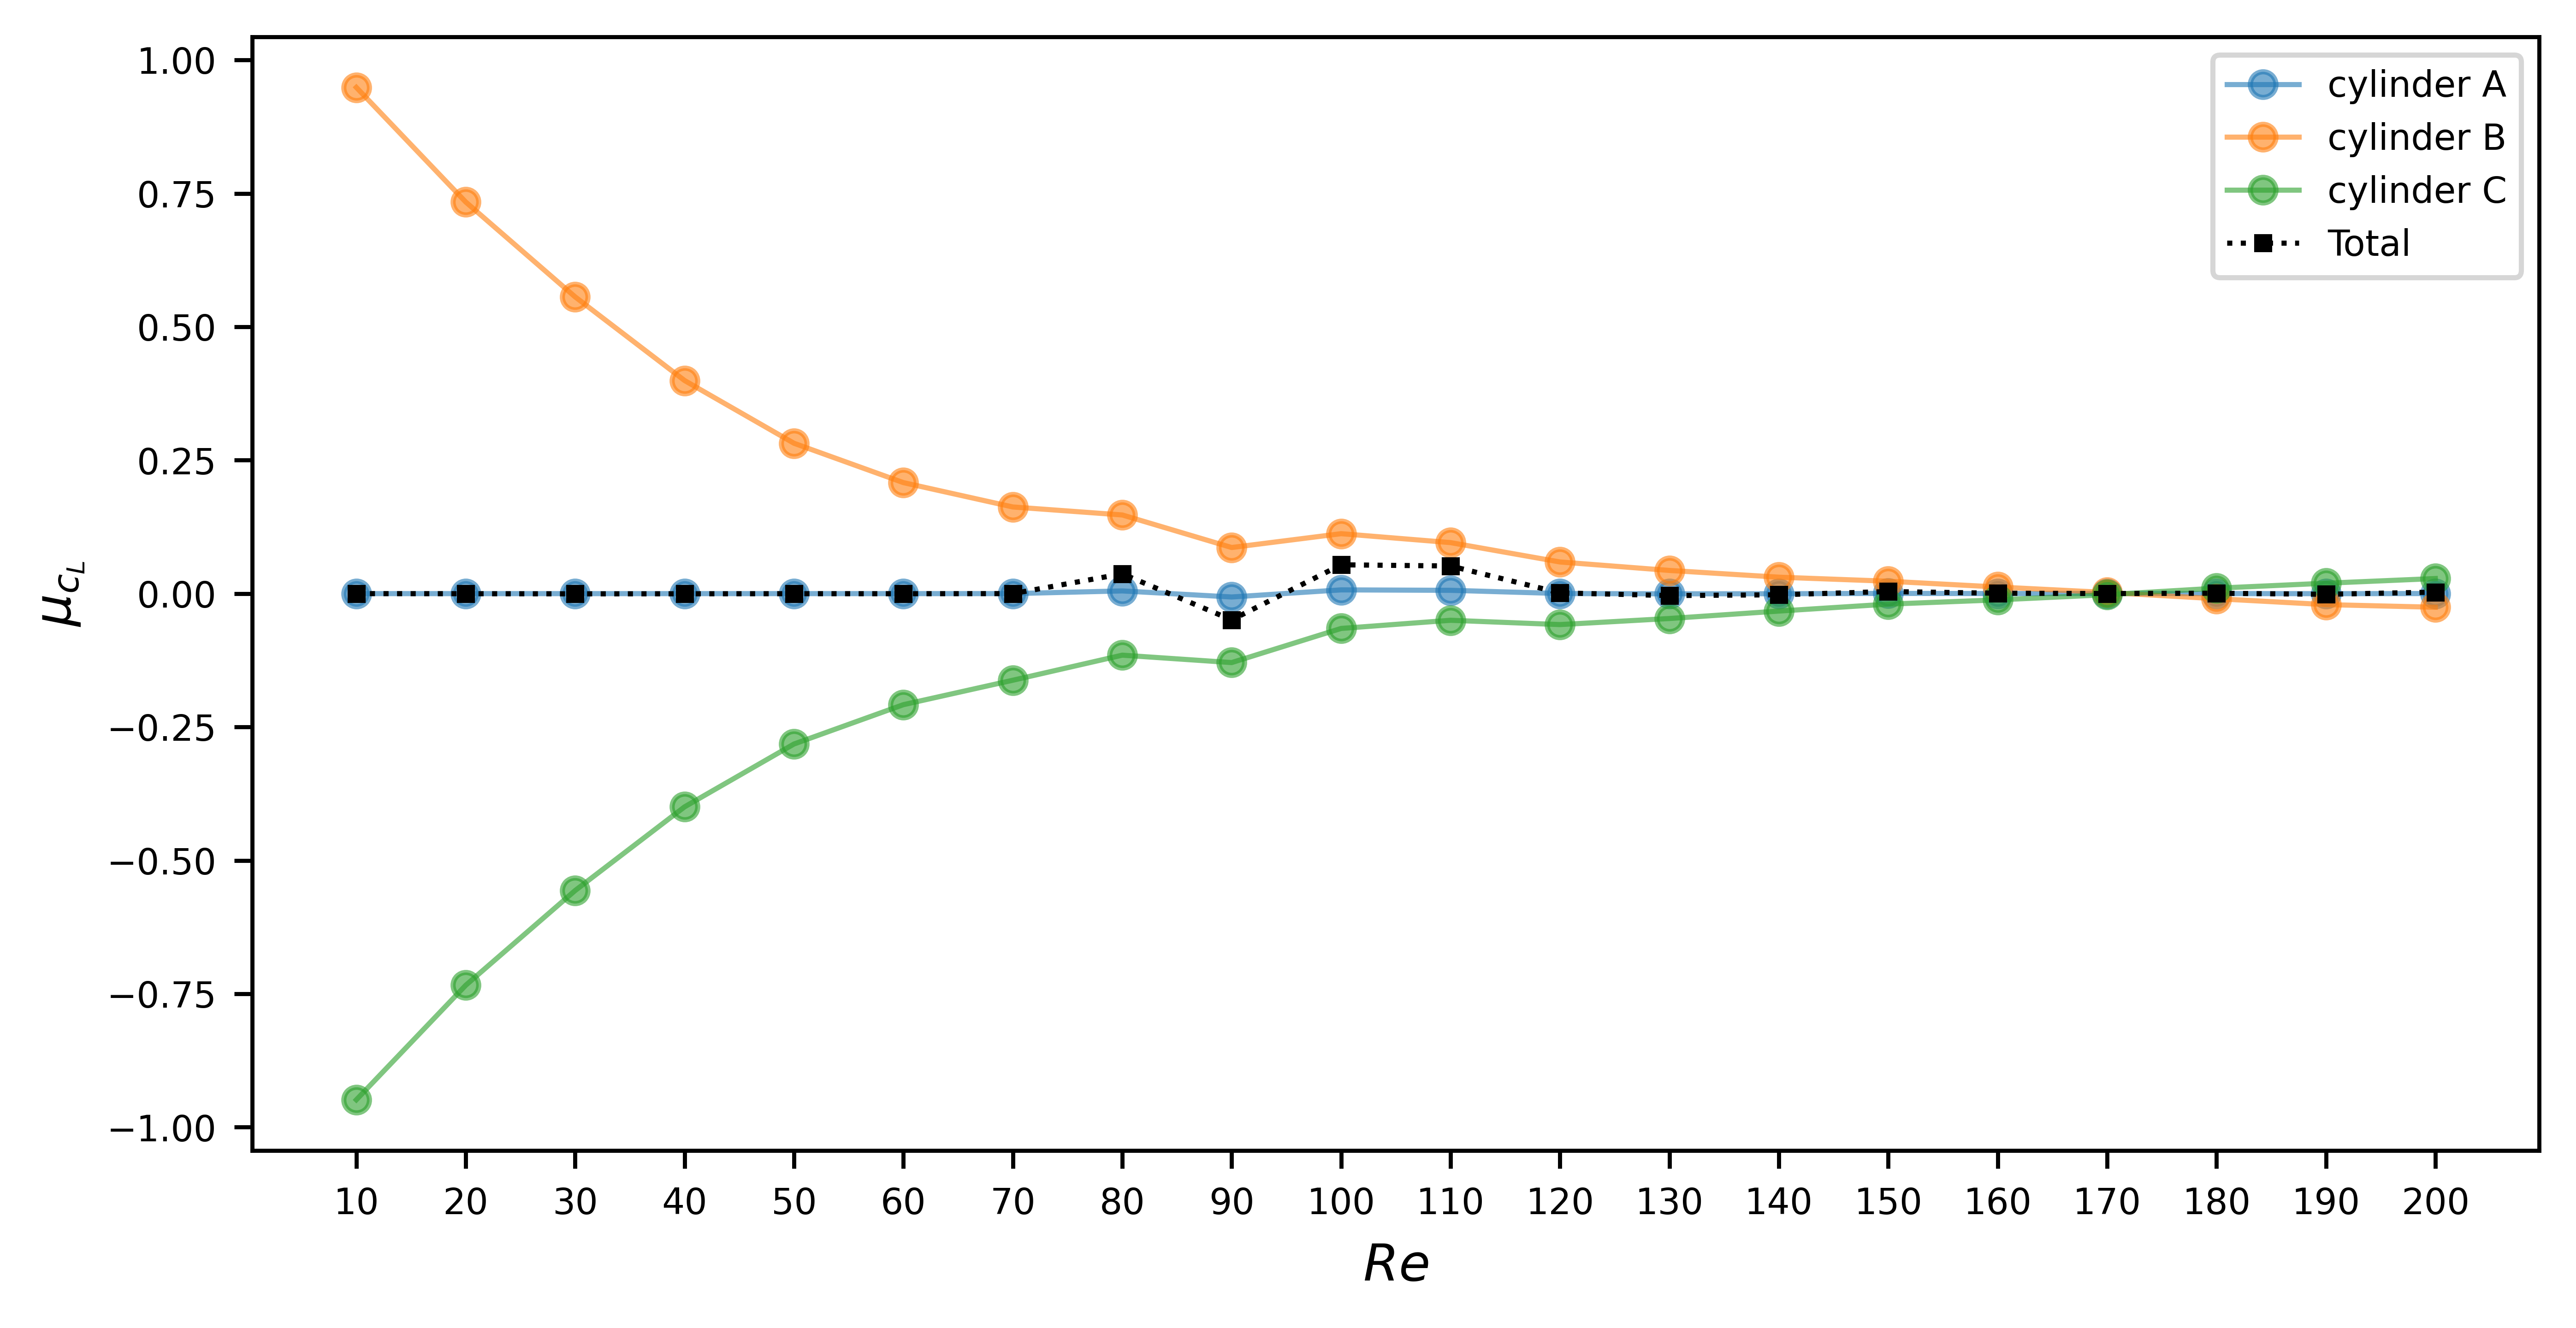

In [5]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\mu_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"$Re$", fontsize=font_size)
ax1.set_xticks(np.arange(10, 200+1, step=10))

ax1.plot(re, a_mean, label="cylinder A", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, b_mean, label="cylinder B", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, c_mean, label="cylinder C", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, total_mean, ":", color="k", label="Total", linewidth=1, marker="s", markersize=2.5)

ax1.legend()
fig.savefig('RE_means.png')

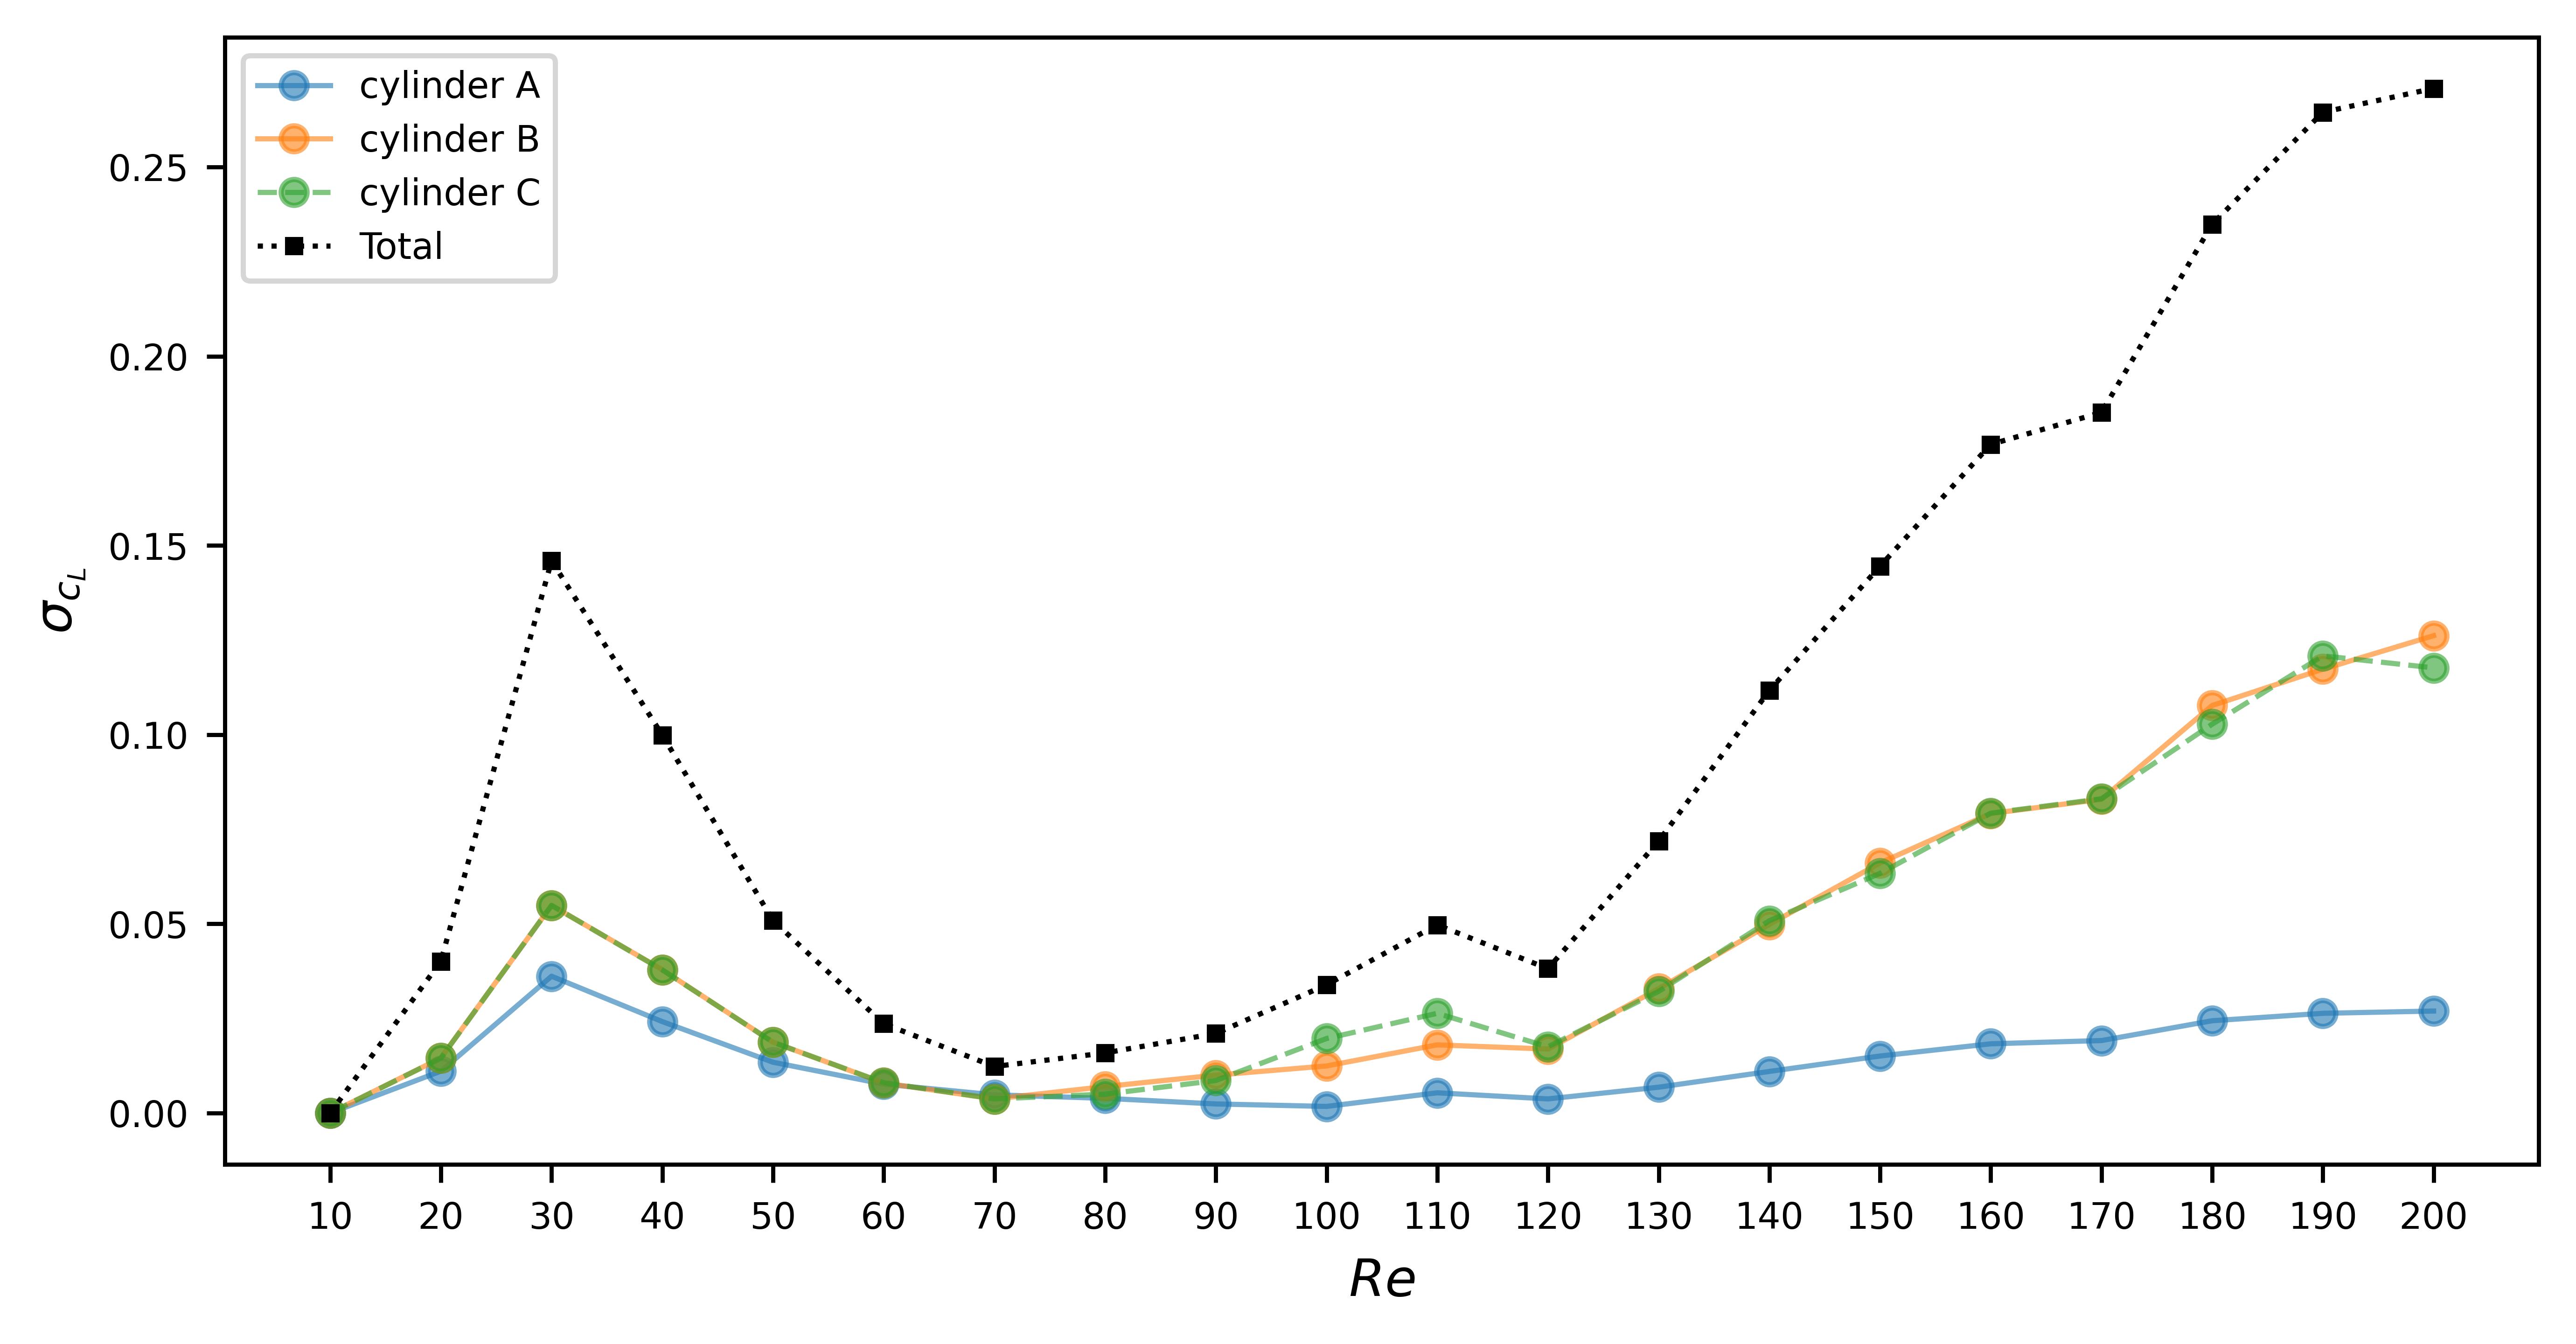

In [6]:
fig, ax1 = plt.subplots(1,1,figsize=(8,4))

ax1.set_ylabel(r"$\sigma_{c_L}$", fontsize=font_size)
ax1.set_xlabel(r"$Re$", fontsize=font_size)
ax1.set_xticks(np.arange(10, 200+1, step=10))

ax1.plot(re, a_std, label="cylinder A", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, b_std, label="cylinder B", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, c_std, "--", label="cylinder C", linewidth=1, alpha=0.6, marker="o", markersize=5)
ax1.plot(re, total_std, ":", color="k", label="Total", linewidth=1, marker="s", markersize=2.5)

ax1.legend()
fig.savefig('RE_std.png')